In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for ML preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#neural network
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
#nerual net analysis
import shap
#random forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #for gridsearch of rf
#evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Neural Net Analysis
import shap

import MLACDS as dt #diffusion simulation tools

pd.set_option('display.max_columns', None)

Files with useable data:
'p0.1_N54/'
'p0.2_N54/'
'p0.3_N54/'

In [2]:
N_neighbours = 8 ### number of neighbours to be extracted

dires = ['p0.2_N54/'] #data we want to load for training

In [3]:
#### list with names to be used in the final dataframe
l_s = list(range(N_neighbours))
l_s_names = []
for i in l_s:
    l_s_names.append('l'+str(i))

In [4]:
### list of columns for bond order parameter
bo = list(range(N_neighbours))
bo_names = []
for i in bo:
    bo_names.append("bo"+str(i))

In [5]:
f_r_cut_vol = 4### cut off used for the local volume calculation
# radius of local volume spher 
#keep @ 4 too small too little neighbour

f_r_cut_sp = 30###A big number here means look for the closest 
                #neighbours
               ###For a small cut-off the number of neighbours
                #might not be the same for all particles


In [6]:
df = dt.load_data(dires, l_s, l_s_names, bo, bo_names, f_r_cut_vol, f_r_cut_sp, N_neighbours)

  0%|          | 0/100 [00:00<?, ?it/s]

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


(54, 8)
(54, 8)


In [7]:
df

,l0,l1,l2,l3,l4,l5,l6,l7,bo0,bo1,bo2,bo3,bo4,bo5,bo6,bo7,vol,n_neighbours,Ds
0,0.563190,0.565949,0.580143,0.707842,0.773975,0.834769,0.884115,0.888794,3.544908,1.009394e-17,0.035187,3.646431e-17,0.254532,6.767539e-17,0.083104,7.637651e-17,0.200455,53.0,0.367946
1,0.575812,0.590612,0.632228,0.649492,0.685031,0.731453,0.744061,0.888794,3.544908,7.252131e-18,0.035187,3.590567e-17,0.254532,6.602351e-17,0.083104,7.457234e-17,0.206035,53.0,0.405260
2,0.564883,0.575887,0.607135,0.613226,0.648257,0.651667,0.694666,0.906113,3.544908,1.063815e-17,0.035187,3.653650e-17,0.254532,6.499404e-17,0.083104,7.466443e-17,0.216181,53.0,0.411686
3,0.566483,0.583332,0.648028,0.700093,0.725940,0.791908,0.866125,0.869910,3.544908,7.595735e-18,0.035187,3.633844e-17,0.254532,6.607907e-17,0.083104,7.435893e-17,0.192773,53.0,0.387032
4,0.552615,0.566483,0.706214,0.773975,0.827710,0.847720,0.905372,0.916870,3.544908,4.767561e-18,0.035187,3.616554e-17,0.254532,6.605771e-17,0.083104,7.418424e-17,0.192975,53.0,0.346245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.614620,0.621393,0.658428,0.676909,0.698650,0.743611,0.803709,0.857511,3.544908,3.059538e-17,0.034166,3.328186e-17,0.253684,4.976994e-17,0.078902,7.386497e-17,0.215685,53.0,0.393998
5396,0.544488,0.611636,0.633573,0.705376,0.734750,0.821348,0.857511,0.864222,3.544908,3.030363e-17,0.034166,3.317297e-17,0.253684,4.979619e-17,0.078902,7.383386e-17,0.198661,53.0,0.386789
5397,0.614163,0.670857,0.734750,0.767399,0.781626,0.794275,0.840062,0.852348,3.544908,2.992687e-17,0.034166,3.313902e-17,0.253684,4.981818e-17,0.078902,7.372116e-17,0.201818,53.0,0.374940
5398,0.587466,0.591041,0.593595,0.608679,0.670857,0.729277,0.758259,0.796437,3.544908,3.025256e-17,0.034166,3.306143e-17,0.253684,4.980164e-17,0.078902,7.381448e-17,0.238355,53.0,0.415230


## Data Preprocessing

In [8]:
data = df.iloc[:,:-1]

In [9]:
target = df.Ds

In [10]:
#splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=13, test_size=0.4)

In [11]:
#scaling data based on training set to prevent data leakage, the scaler computed from training set statistics will be applied to test data
scaler = preprocessing.StandardScaler().fit(X_train)

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## NN Model

In [13]:
#the first nn model. This contains:
model = keras.Sequential([
    layers.Dense(32, input_shape=(18,), activation="relu"), #input layer
    layers.Dense(16, activation="relu"), #first hidden layer less nodes
    layers.Dropout(0.5), #dropout layer with 50% dropout to prevent overfitting
    layers.Dense(1) #output layer, no activation function as must be continuous
])

2024-01-25 14:52:11.260391: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [136]:
# # Compile the model
model.compile(optimizer=optimizers.RMSprop(),
                loss='mse',
                metrics=['mae'])

In [137]:
# # Compile the model
# model.compile(optimizer=optimizers.SGD(),
#                 loss='mse',
#                 metrics=['mae'])

In [138]:
#train the model (this takes a little while)
history = model.fit(X_train_scaled, y_train,
                    epochs=100, 
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
102/102 [==============================] - 1s 5ms/step - loss: 1.8612e-04 - mae: 0.0094 - val_loss: 8.0079e-05 - val_mae: 0.0072
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 1.8517e-04 - mae: 0.0094 - val_loss: 4.5803e-05 - val_mae: 0.0053
Epoch 3/100
102/102 [==============================] - 0s 4ms/step - loss: 1.8188e-04 - mae: 0.0095 - val_loss: 1.0404e-04 - val_mae: 0.0081
Epoch 4/100
102/102 [==============================] - 0s 5ms/step - loss: 1.7144e-04 - mae: 0.0092 - val_loss: 6.5180e-05 - val_mae: 0.0059
Epoch 5/100
102/102 [==============================] - 0s 5ms/step - loss: 1.8763e-04 - mae: 0.0095 - val_loss: 9.8516e-05 - val_mae: 0.0076
Epoch 6/100
102/102 [==============================] - 0s 4ms/step - loss: 1.8632e-04 - mae: 0.0096 - val_loss: 8.3774e-05 - val_mae: 0.0072
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 1.9471e-04 - mae: 0.0096 - val_loss: 8.2566e-05 - val_mae: 0.0072
Epoch 8/100
1

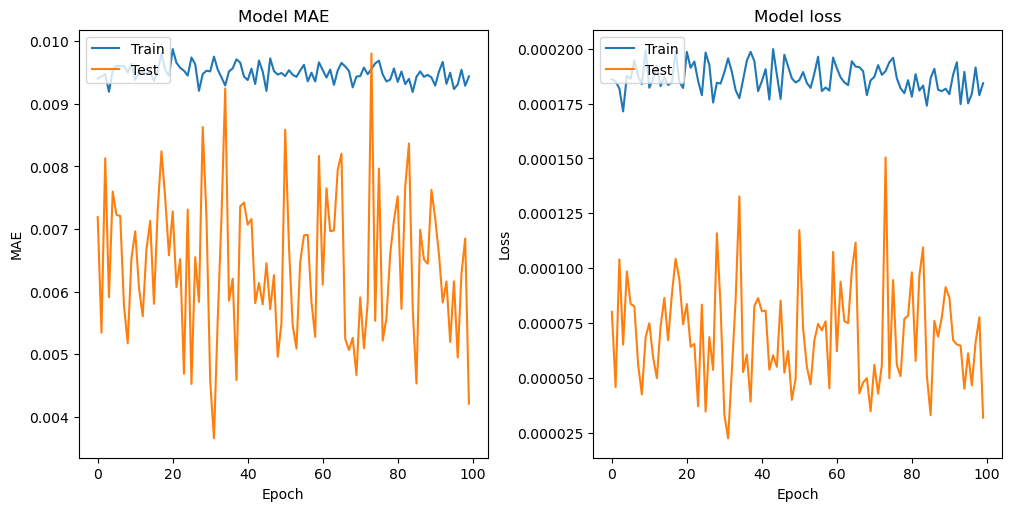

In [139]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5), layout="constrained", sharex=True)

axs[0].plot(history.history['mae'])
axs[0].plot(history.history['val_mae'])
axs[0].set_title('Model MAE')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Epoch')
# axs[0].set_ylim(0,0.01)
axs[0].legend(['Train', 'Test'], loc='upper left')

axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model loss') 
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch') 
axs[1].legend(['Train', 'Test'], loc='upper left') 

plt.show()

In [ ]:
# load JS visualization for notebook vis
shap.initjs()

In [230]:
background = shap.sample(X_train_scaled, 100)

In [231]:
explainer = shap.KernelExplainer(model.predict, background)

4/4 [==============================] - 0s 10ms/step


In [232]:
shap_values = explainer.shap_values(X_test_scaled[:50], nsamples=50)

  0%|          | 0/50 [00:00<?, ?it/s]

157/157 [==============================] - 0s 1ms/step


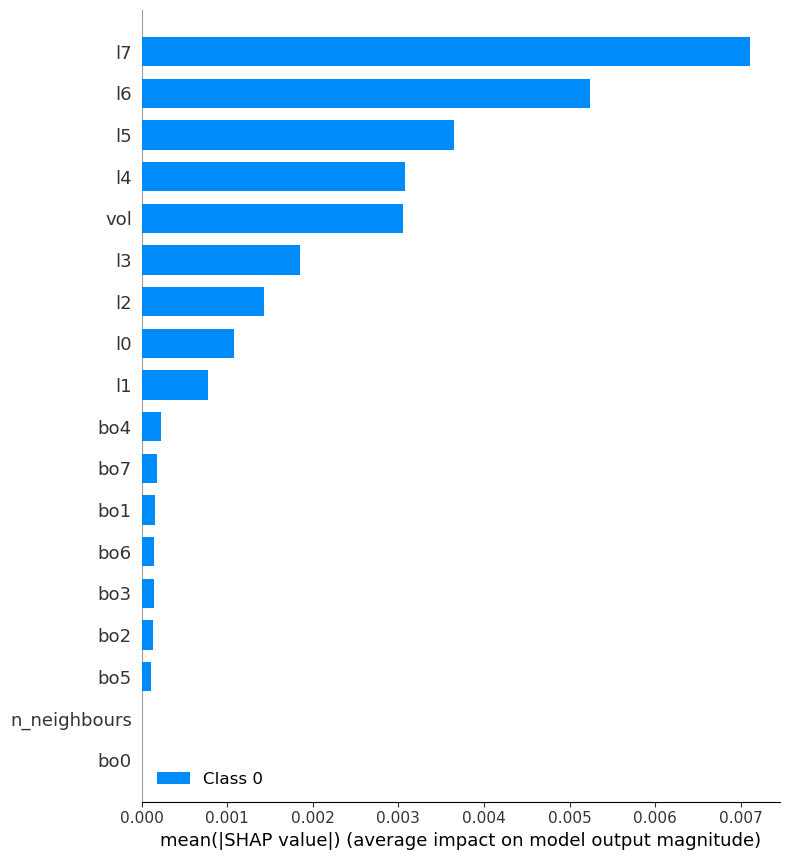

In [234]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=data.columns)

In [236]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test_scaled[:100], feature_names=data.columns)

In [ ]:
y_pred_nn = model.predict(X_test_scaled).ravel()

In [152]:
nn_r2 = r2_score(y_test, y_pred_nn)

nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(nn_mse)


In [153]:
print("NN Model R2:", nn_r2)
print("NN Model MAE:", nn_mae)
print("NN Model MSE:", nn_mse)
print("NN Model RMSE:", nn_rmse)

NN Model R2: 0.8951206138695915
NN Model MAE: 0.006778246745261514
NN Model MSE: 7.23555616779888e-05
NN Model RMSE: 0.008506207244006508


## Random Forest

In [21]:
# # gridsearch to give good challenge to neural net

# params = {
#     "n_estimators":[200,300,400,500],
#     "criterion":("squared_error", "poisson", "absolute_error"),
#     "max_depth":[6,10,14,18]
#          } 

# rf = RandomForestRegressor()

# clf = GridSearchCV(rf, params, verbose=1)

In [22]:
# #fitting the model
# clf.fit(X_train_scaled, y_train)

In [23]:
# clf.best_params_

In [24]:
#run this cell instead of the gridsearch to save alot of time.
clf = RandomForestRegressor(criterion="squared_error", max_depth=14, n_estimators=300)

clf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=14, n_estimators=300)

In [221]:
def sort_list(list1, list2): #function from geeksforgeeks.org
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs, reverse=True)]
    return z


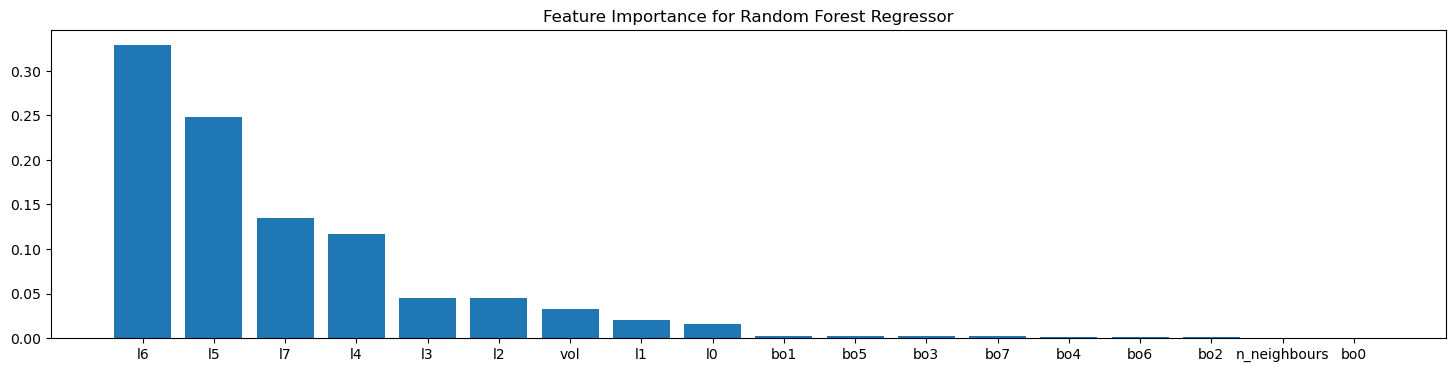

In [222]:
rf_feat_imp = clf.feature_importances_
feat_names = data.columns

ranked_feat_names = sort_list(feat_names, rf_feat_imp)

ranked_rf_feature_imp = sorted(rf_feat_imp, reverse=True)

fig, ax = plt.subplots(figsize=(18,4))
ax.bar(ranked_feat_names, ranked_rf_feature_imp)
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

In [25]:
#predictions
y_pred_rf = clf.predict(X_test_scaled)

In [149]:
rf_r2 = r2_score(y_test, y_pred_rf)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)


In [150]:
print("RF Model R2:", rf_r2)
print("RF Model MAE:", rf_mae)
print("RF Model MSE:", rf_mse)
print("RF Model RMSE:", rf_rmse)

RF Model R2: 0.9704289120359553
RF Model MAE: 0.0033319478010085234
RF Model MSE: 2.0400888658970776e-05
RF Model RMSE: 0.004516734291384736


## Volume Correction

In [27]:
VC_pred = dt.VolumeCorrection(X_test.vol)

In [176]:
VC_r2 = r2_score(y_test, VC_pred)

VC_mae = mean_absolute_error(y_test, VC_pred)
VC_mse = mean_squared_error(y_test, VC_pred)
VC_rmse = np.sqrt(VC_mse)

In [148]:
print("VC Model R2:", VC_r2)
print("VC Model MAE:", VC_mae)
print("VC Model MSE:", VC_mse)
print("VC Model RMSE:", VC_rmse)

VC Model R2: 0.07674040089055933
VC Model MAE: 0.02016467793805865
VC Model MSE: 0.0006369503992433231
VC Model RMSE: 0.025237876282352346


## Looking at Metrics and Predictions

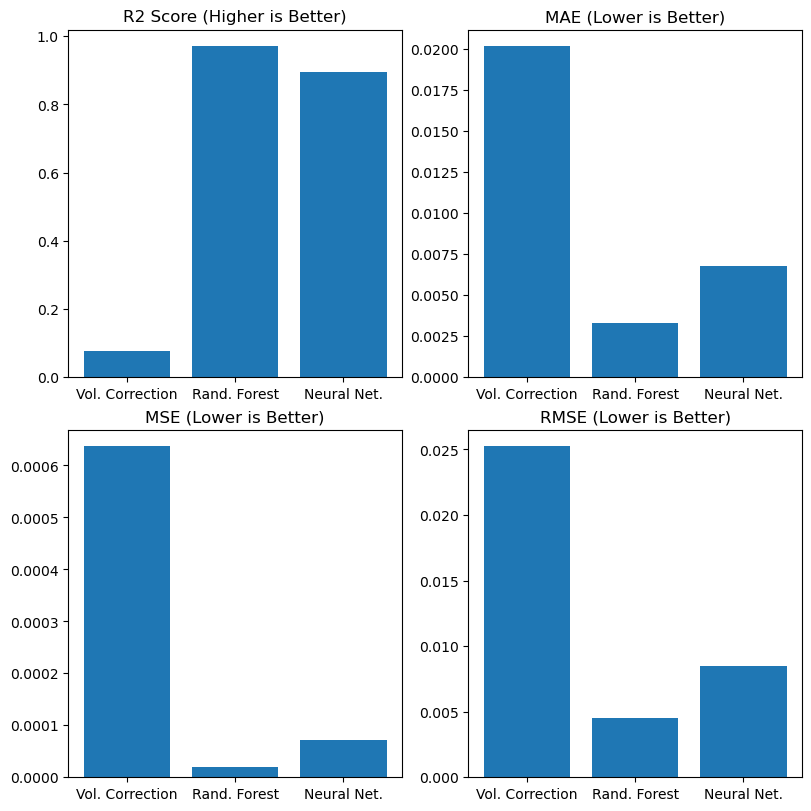

In [164]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8), layout="constrained")
models = ["Vol. Correction", "Rand. Forest", "Neural Net."]
r2_metric = [VC_r2, rf_r2, nn_r2]
mae_metric = [VC_mae, rf_mae, nn_mae]
mse_metric = [VC_mse, rf_mse, nn_mse]
rmse_metric = [VC_rmse, rf_rmse, nn_rmse]

axs[0][0].bar(models, r2_metric)
axs[0][1].bar(models, mae_metric)
axs[1][0].bar(models, mse_metric)
axs[1][1].bar(models, rmse_metric)

axs[0][0].set_title("R2 Score (Higher is Better)")
axs[0][1].set_title("MAE (Lower is Better)")
axs[1][0].set_title("MSE (Lower is Better)")
axs[1][1].set_title("RMSE (Lower is Better)")

plt.show()

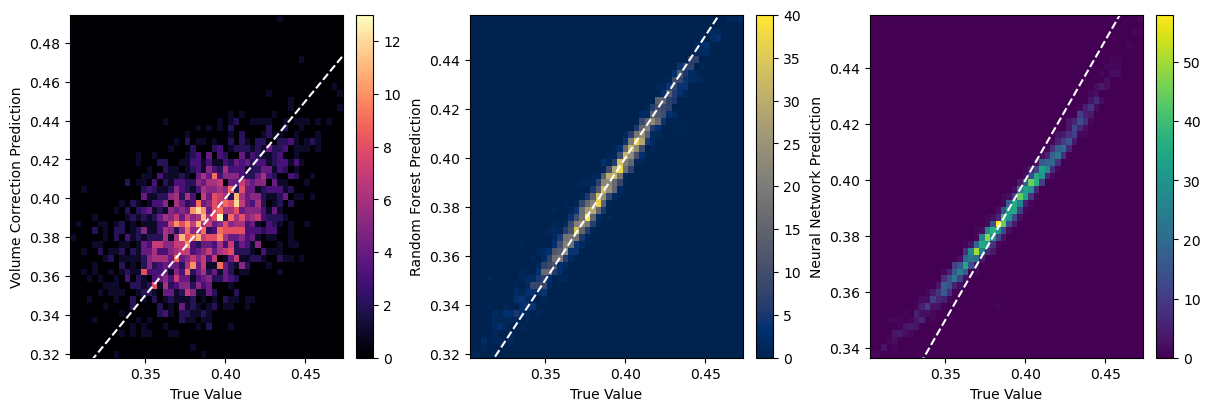

In [166]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), layout="constrained")#, sharex=True, sharey=True)

im0 = axs[0].hist2d(y_test, VC_pred, bins=50, cmap="magma")
im1 = axs[1].hist2d(y_test, y_pred_rf, bins=50, cmap="cividis")
im2 = axs[2].hist2d(y_test, y_pred_nn, bins=50)

axs[0].plot([0,1],[0,1], "w--")
axs[1].plot([0,1],[0,1], "w--")
axs[2].plot([0,1],[0,1], "w--")

fig.colorbar(im0[3], ax=axs[0])
fig.colorbar(im1[3], ax=axs[1])
fig.colorbar(im2[3], ax=axs[2])

axs[0].set_xlabel("True Value")
axs[0].set_ylabel("Volume Correction Prediction")

axs[1].set_xlabel("True Value")
axs[1].set_ylabel("Random Forest Prediction")

axs[2].set_xlabel("True Value")
axs[2].set_ylabel("Neural Network Prediction")

plt.show()

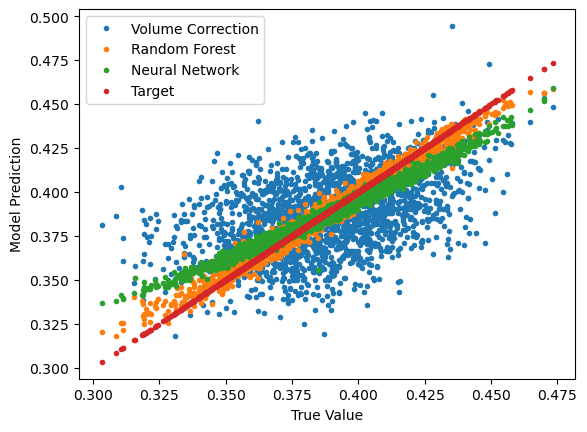

In [65]:
plt.plot(y_test, VC_pred, ".", label="Volume Correction")
plt.plot(y_test, y_pred_rf, ".", label="Random Forest")
plt.plot(y_test, y_pred_nn, ".", label="Neural Network")
plt.plot(y_test, y_test, ".", label="Target")
plt.xlabel("True Value")
plt.ylabel("Model Prediction")
plt.legend()
plt.show()

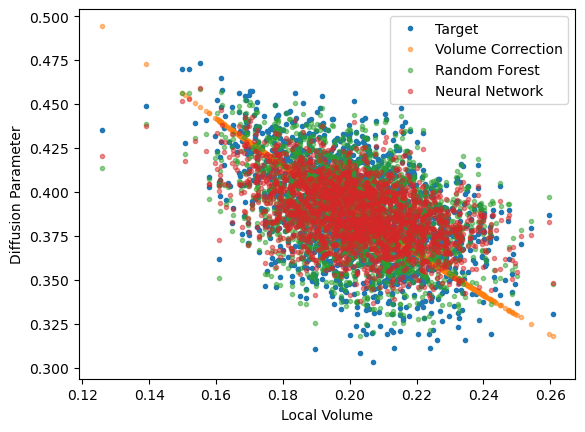

In [244]:
#this plot is a bit of a mess
plt.plot(X_test.vol, y_test, ".", label="Target")
plt.plot(X_test.vol, VC_pred, ".", label="Volume Correction", alpha=0.5)
plt.plot(X_test.vol, y_pred_rf, ".", label="Random Forest", alpha=0.5)
plt.plot(X_test.vol, y_pred_nn, ".", label="Neural Network", alpha=0.5)
plt.xlabel("Local Volume")
plt.ylabel("Diffusion Parameter")
plt.legend()
plt.show()

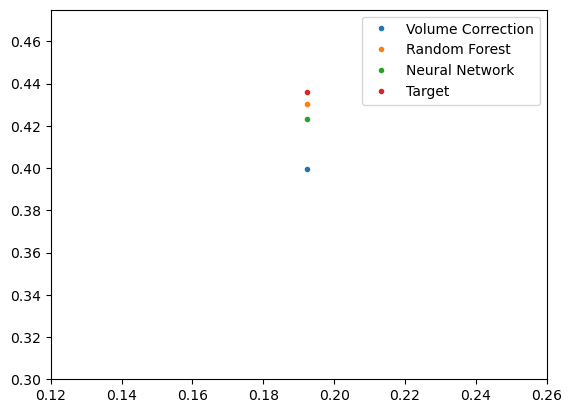

In [245]:
ind = 20
num = 1

plt.plot(X_test.vol[ind:ind+num], VC_pred[ind:ind+num], ".", label="Volume Correction")
plt.plot(X_test.vol[ind:ind+num], y_pred_rf[ind:ind+num], ".", label="Random Forest")
plt.plot(X_test.vol[ind:ind+num], y_pred_nn[ind:ind+num], ".", label="Neural Network")
plt.plot(X_test.vol[ind:ind+num], y_test[ind:ind+num], ".", label="Target")
plt.xlim(0.12, 0.26)
plt.ylim(0.3, 0.475)
plt.legend()
plt.show()